# 국내 편의점 위치 분석
### 의문점 - 왜 국내 편의점 업계의 주가의 차이가 있을까?


---


- GS25( GS리테일 ) 과 CU ( BGF리테일 )의 주가를 비교해 보면, BGF리테일의 주가만 올라가는 것을 알 수 있습니다.


---



- 기사 링크 - http://www.ezyeconomy.com/news/articleView.html?idxno=109852 
([분석] 편의점 2강 ‘GS·BGF 리테일’ 코로나19 악재로 ‘희비 교차’)
- 기사의 내용을 보면, 
'*올해 전망은 BGF리테일에 더 긍정적이다. 개학 등으로 특수입지 상권 비중이 높은 BGF리테일의 실적 회복이 유력한 반면, 편의점 사업 외 호텔과 슈퍼 등을 운영하는 GS리테일의 회복 속도가 상대적으로 더딜 것이란 관측이 지배적이라 서다.*' 라는 내용이 언급되어 있다.
#####  출처 : 이지경제(http://www.ezyeconomy.com)


---



- 즉, CU 가 GS25 보다, 학교 관광지등 특수지에 위치해 있다는 내용인데 데이터 분석을 이용하여 이를 확인해 보자.


---
### 데이터셋 자료 출처
- 공공기관 데이터 : https://www.data.go.kr/data/15012005/fileData.do
- GS리테일 및 BGF리테일 : Yahoo Finance

In [1]:
 # 시각화 모듈 plotly 다운로드
!pip install plotly

In [2]:
 # 한글을 사용하기 위해 나눔 글꼴 다운로드 (Colab 사용자만)
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [3]:
# 라이브러리 불러오기 및 글꼴 설정
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import datetime

import plotly.io as pio
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly.validators.scatter.marker import SymbolValidator

plt.rc('font', family='NanumBarunGothic')
plt.rc("axes",unicode_minus=False)
from IPython.display import set_matplotlib_formats

In [4]:
# GS리테일 및 BGF리테일 주가 비교
gs_price = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/gs.csv")
bgf_price = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/bgf.csv")

gs_price = gs_price[["Date","Close"]]
bgf_price = bgf_price[["Date","Close"]]

gs_price['Date']=pd.to_datetime(gs_price['Date'])
bgf_price['Date']=pd.to_datetime(bgf_price['Date'])

gs_price = gs_price[gs_price['Date']> '2020-10-30']
bgf_price = bgf_price[bgf_price['Date']> '2020-10-30']

gs_price['Close'] = gs_price['Close'] / gs_price.iloc[0]['Close'] - 1 
bgf_price['Close'] = bgf_price['Close'] / bgf_price.iloc[0]['Close'] - 1 

fig = go.Figure()
fig.add_trace(go.Scatter(x=gs_price['Date'],y=gs_price['Close'],name='GS25'))
fig.add_trace(go.Scatter(x=bgf_price['Date'],y=bgf_price['Close'],name='CU'))
fig.update_layout(title="GS25(GS리테일), CU(BGF리테일) 주가 비교")
fig.add_annotation(x="2021-2-9", y=0.42,
            text="CU",
            showarrow=True,
            arrowhead=True)
fig.add_annotation(x="2021-2-9", y=0.12,
            text="GS25",
            showarrow=True,
            arrowhead=True)
fig.update_layout(showlegend=False)
fig.show()

In [5]:
pio.write_html(fig, file='index.html', auto_open=True)

In [6]:
# 데이터셋 불러오기
df_incheon = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_인천_202012.csv",sep='|')

In [7]:
df_incheon.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,17175369,박서방네목로주점,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,28,인천광역시,28185,연수구,2818578000,동춘1동,2.818510e+09,동춘동,2818510500207960010,1,대지,796,10.0,인천광역시 연수구 동춘동 796-10,281854256223,인천광역시 연수구 청량로46번길,7,NaN,2818510500107960010163157,NaN,인천광역시 연수구 청량로46번길 7,406131.0,21943.0,NaN,NaN,NaN,126.660078,37.413774


In [8]:
# 데이터셋에 사용할 데이터 컬럼만 추출하기
col = ['상호명','상권업종대분류명','상권업종중분류명','상권업종소분류명','시도명','도로명주소','경도','위도']
df_incheon = df_incheon[col]
df_incheon.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,도로명주소,경도,위도
0,박서방네목로주점,음식,한식,한식/백반/한정식,인천광역시,인천광역시 연수구 청량로46번길 7,126.660078,37.413774
1,홍가네맛집,음식,유흥주점,민속주점,인천광역시,인천광역시 동구 방축로 105,126.656098,37.484108
2,츄로하임,음식,한식,한식/백반/한정식,인천광역시,인천광역시 서구 솔빛로 55,126.626740,37.525163
3,간석미용실,생활서비스,이/미용/건강,여성미용실,인천광역시,인천광역시 남동구 석촌로14번길 5,126.709349,37.461969
4,라헬,소매,의복의류,일반의류,인천광역시,인천광역시 연수구 청능대로 124,126.677224,37.410678


In [9]:
# 편의점 데이터열 구하기
df_incheon['상권업종대분류명'].unique()

array(['음식', '생활서비스', '소매', '숙박', '부동산', '학문/교육', '관광/여가/오락', '스포츠'],
      dtype=object)

In [10]:
# 상권업종대분류명이 소매인 데이터만 사용
df_incheon = df_incheon[df_incheon['상권업종대분류명'] =='소매']

In [11]:
df_incheon = df_incheon[df_incheon['상권업종중분류명'] =='종합소매점']

In [12]:
df_incheon = df_incheon[df_incheon['상권업종소분류명'] =='편의점']

In [13]:
df_incheon.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,도로명주소,경도,위도
65,GS25,소매,종합소매점,편의점,인천광역시,인천광역시 부평구 시장로20번길 15,126.725887,37.492558
100,CU,소매,종합소매점,편의점,인천광역시,인천광역시 남동구 남동대로922번길 15,126.709040,37.464831
125,훼미리마트가좌현우,소매,종합소매점,편의점,인천광역시,인천광역시 서구 가정로 128,126.671807,37.496008
134,GS25,소매,종합소매점,편의점,인천광역시,인천광역시 서구 길주로 91,126.672003,37.506669
147,CU,소매,종합소매점,편의점,인천광역시,"인천광역시 미추홀구 경원대로 882, (주안동)",126.689896,37.461313


In [14]:
# 편의점 상호명에 포함된 단어 추출하기 
df_incheon['상호명'] = df_incheon['상호명'].apply(lambda x: str.upper(x)) # 모든 영문자를 대문자로 바꿈

### 각 편의점 상호명에 포함되어있는 단어들은 다음과 같습니다. 이를 이용해서 편의점을 구분하도록 하겠습니다.

- 편의점별 상호명에 포함된 단어
1.   GS25 - GS25, 지에스25, 지에스이십오, GS리테일, 엘지25
2.   세븐일레븐 - 코리아세븐, 세븐일레븐 , 7일레븐
3.   CU - CU, 씨유, 비지에프리테일, 훼미리마트
4.   이마트 - 이마트, EMART24, E-마트


In [15]:
df_incheon['브랜드'] = 'no_brand'
df_incheon.loc[df_incheon['상호명'].str.contains('GS|지에스|엘지25'),'브랜드'] = 'GS25'
df_incheon.loc[df_incheon['상호명'].str.contains('세븐|일레븐'),'브랜드'] = '세븐일레븐'
df_incheon.loc[df_incheon['상호명'].str.contains('CU|씨유|비지에프|훼미리'),'브랜드'] = 'CU'
df_incheon.loc[df_incheon['상호명'].str.contains('이마트|EMART|E-마트'),'브랜드'] = '이마트24'

In [16]:
df_incheon

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,도로명주소,경도,위도,브랜드
65,GS25,소매,종합소매점,편의점,인천광역시,인천광역시 부평구 시장로20번길 15,126.725887,37.492558,GS25
100,CU,소매,종합소매점,편의점,인천광역시,인천광역시 남동구 남동대로922번길 15,126.709040,37.464831,CU
125,훼미리마트가좌현우,소매,종합소매점,편의점,인천광역시,인천광역시 서구 가정로 128,126.671807,37.496008,CU
134,GS25,소매,종합소매점,편의점,인천광역시,인천광역시 서구 길주로 91,126.672003,37.506669,GS25
147,CU,소매,종합소매점,편의점,인천광역시,"인천광역시 미추홀구 경원대로 882, (주안동)",126.689896,37.461313,CU
...,...,...,...,...,...,...,...,...,...
117762,이마트,소매,종합소매점,편의점,인천광역시,인천광역시 서구 북항로32번안길 8,126.645790,37.507066,이마트24
118143,GS25,소매,종합소매점,편의점,인천광역시,인천광역시 서구 크리스탈로74번길 17,126.638516,37.532039,GS25
118445,세븐일레븐,소매,종합소매점,편의점,인천광역시,인천광역시 연수구 하모니로 158,126.641942,37.384040,세븐일레븐
118446,CU,소매,종합소매점,편의점,인천광역시,인천광역시 부평구 대정로 50,126.725692,37.494710,CU


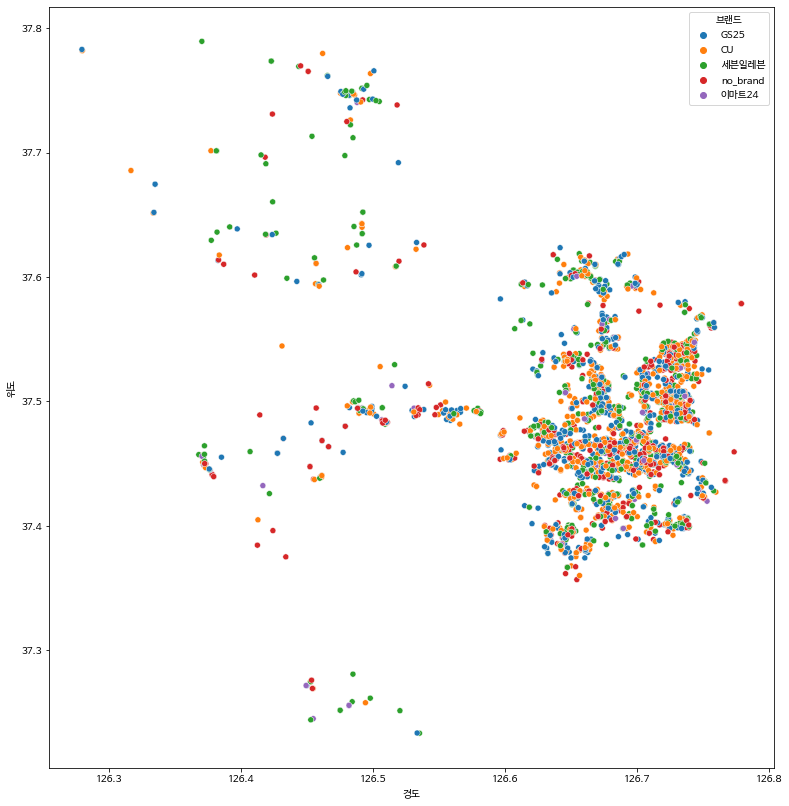

In [17]:
plt.figure(figsize=(13,14))
sns.scatterplot(data = df_incheon[df_incheon['경도']>126], x='경도', y='위도',hue='브랜드')

### 다른 지역 데이터 하나로 합치기
- 기존에 인천의 데이터를 가지고 했던 방법을 이용하여, 데이터 컬럼 수정 후 데이터를 합치도록 하겠습니다.

In [18]:
# Load Dataset
df_1 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_강원_202012.csv",sep='|')
df_2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_경기_202012.csv",sep='|')
df_3 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_경남_202012.csv",sep='|')
df_4 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_경북_202012.csv",sep='|')
df_5 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_광주_202012.csv",sep='|')
df_6 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_대구_202012.csv",sep='|')
df_7 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_대전_202012.csv",sep='|')
df_8 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_부산_202012.csv",sep='|')
df_9 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_서울_202012.csv",sep='|')
df_10 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_세종_202012.csv",sep='|')
df_11 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_울산_202012.csv",sep='|')
df_12 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_인천_202012.csv",sep='|')
df_13 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_전남_202012.csv",sep='|')
df_14 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_전북_202012.csv",sep='|')
df_15 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_제주_202012.csv",sep='|')
df_16 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_충남_202012.csv",sep='|')
df_17 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/convenient store/소상공인시장진흥공단_상가(상권)정보_20201231/소상공인시장진흥공단_상가(상권)정보_충북_202012.csv",sep='|')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.



In [19]:
# 위의 데이터와 같은 방식으로 모든 지역의 데이터를 처리
df_list = [df_1,df_2,df_3,df_4,df_5,df_6,df_7,df_8,df_9,df_10,df_11,df_12,df_13,df_14,df_15,df_16,df_17]
new_df = []
for i in df_list:
  i = i[col]
  i = i[i['상권업종소분류명'] =='편의점']
  i['상호명'] = i['상호명'].apply(lambda x: str.upper(x))
  i['브랜드'] = 'no_brand'
  i.loc[i['상호명'].str.contains('GS|지에스|엘지25'),'브랜드'] = 'GS25'
  i.loc[i['상호명'].str.contains('세븐|일레븐'),'브랜드'] = '세븐일레븐'
  i.loc[i['상호명'].str.contains('CU|씨유|비지에프|훼미리'),'브랜드'] = 'CU'
  i.loc[i['상호명'].str.contains('이마트|EMART|E-마트'),'브랜드'] = '이마트24'
  new_df.append(i)

In [20]:
# 모든지역 데이터 병합 및 no_brand 편의점 데이터 삭제
df = pd.concat(new_df)
no_brand_index = df[df.loc[:,'브랜드']=='no_brand'].index
df = df.drop(no_brand_index)

In [21]:
# 더이상 사용하지 않을 데이터 삭제
df.drop(['상권업종대분류명','상권업종중분류명'],axis = 1,inplace=True)

In [22]:
df

,상호명,상권업종소분류명,시도명,도로명주소,경도,위도,브랜드
216,세븐일레븐,편의점,강원도,강원도 홍천군 남면 양덕원로 82,127.768324,37.616567,세븐일레븐
364,GS25,편의점,강원도,강원도 원주시 나비허리길 50,127.958045,37.323734,GS25
537,세븐일레븐,편의점,강원도,강원도 원주시 남산로48번길 15,127.946466,37.342598,세븐일레븐
613,GS25,편의점,강원도,강원도 화천군 사내면 수피령로 25,127.524920,38.069686,GS25
621,CU,편의점,강원도,강원도 동해시 효자로 267,129.069839,37.488917,CU
...,...,...,...,...,...,...,...
92886,GS25,편의점,충청북도,충청북도 충주시 신니면 덕고개로 4,127.736671,36.996542,GS25
92887,세븐일레븐,편의점,충청북도,충청북도 충주시 노은면 연하중앙길 42,127.756867,37.047230,세븐일레븐
92888,GS25,편의점,충청북도,충청북도 충주시 예성로 38,127.930788,36.961101,GS25
93081,이마트,편의점,충청북도,충청북도 진천군 문백면 봉죽2길 20-78,127.423920,36.785067,이마트24


## 편의점 점유율 확인하기

In [23]:
df_count = pd.DataFrame(df.groupby('브랜드')['도로명주소'].count())
df_count.reset_index(inplace=True)
fig = px.pie(df_count, names='브랜드',values='도로명주소',hole = 0.8,title='relation tips')
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.update_layout(
    title_text="전국 편의점 점유율",
    annotations=[dict(text='전국 편의점 점유율', x=0.5, y=0.5, font_size=20, showarrow=False)])

## 시각화를 통해 전국 편의점 위치 나타내기

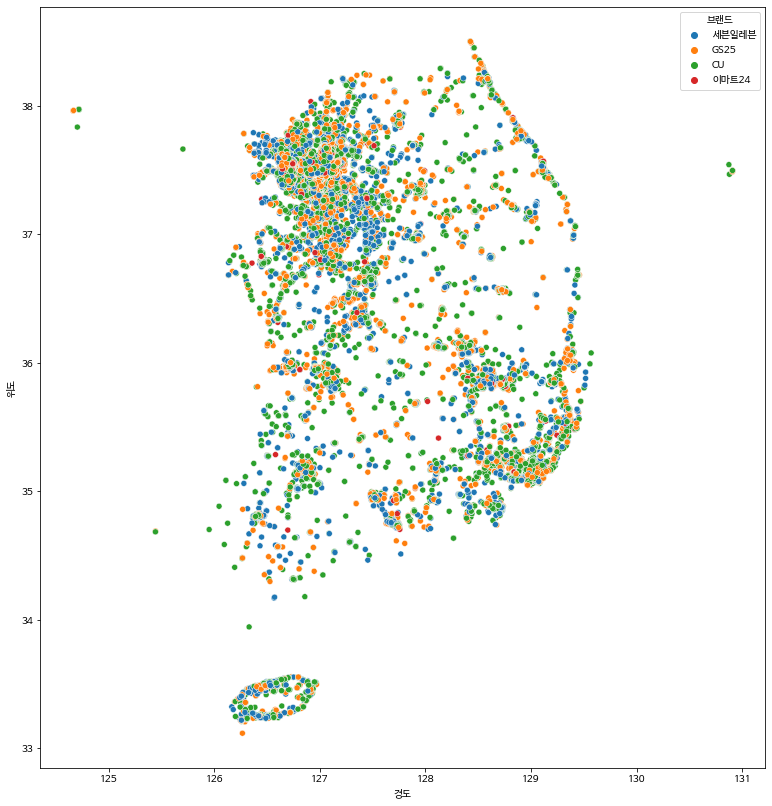

In [24]:
# seaborn 을 이용한 대략적인 위치 나타내기
plt.figure(figsize=(13,14))
sns.scatterplot(data= df, x='경도', y='위도',hue='브랜드')
plt.show()

In [25]:
# plotly 를 이용한 동적 scatter plot 나타내기
fig =px.scatter(df, x='경도', y='위도',color='브랜드',hover_data=['도로명주소','브랜드'])
fig.update_layout(height=900, width=900)

Output hidden; open in https://colab.research.google.com to view.

### Conclusion
- scatter plot를 사용하여, 시각화해본 결과, 두 편의점 모두 대도시 위주로 분포되어 있지만, 특히 GS25보다 CU편의점에 경우 더 많은 지역에 분포되어 있음을 알 수 있다.
- 4개의 편의점중 가장 도시 위주로 분포되어 있는 편의점은 이마트24이다.

In [26]:
# 지역별 GS25, CU 편의점 비율 확인하기
df = df[(df.loc[:,"브랜드"]=='CU') | (df.loc[:,"브랜드"]=='GS25')]
table = pd.DataFrame(df.groupby(['브랜드','시도명'])['시도명'].count())
table.columns=['value']
table = table.reset_index()
table.loc[table["브랜드"]=='CU','value'] = table.loc[table["브랜드"]=='CU','value'] / df.groupby('브랜드')['상호명'].count()[0]
table.loc[table["브랜드"]=='GS25','value'] = table.loc[table["브랜드"]=='GS25','value'] / df.groupby('브랜드')['상호명'].count()[1]
table.value = table.value.apply(lambda x: np.round(x,3))
fig = px.bar(table , x='시도명', y='value',color='브랜드',barmode='group',text='value')
fig.update_traces(textposition='outside')
fig.update_layout(title="전국 브랜드별 편의점 비율 ")
fig.show()

#### 미세한 차이이지만, GS25의 수도권 점유율이 CU보다 높으며, 지방에 CU의 점유율이 더 높았다.

## folium 을 이용한 시각화
- 데이터가 너무 많아 시각화하는데 너무 많은 시간이 소요되므로, CU편의점과 GS25편의점의 일부 데이터만 시각화 하도록 하겠습니다. 

In [27]:
df.reset_index(drop=True,inplace=True)

In [28]:
import folium
m = folium.Map(location=[df['위도'].mean(), df['경도'].mean()], zoom_start=7)
df = df.sample(10000)
for i in range(len(df)):
  tooltip = df.iloc[i]['브랜드']
  if df.iloc[i]['브랜드'] =='CU':
    color = 'red'
  else:
    color = 'blue'
  folium.CircleMarker([df.iloc[i]['위도'],df.sample(1)['경도']],
                            radius=2,
                            color=color,
                            fill=False,
                            tooltip=tooltip,
                           ).add_to(m)
m

Output hidden; open in https://colab.research.google.com to view.